<center><img src="https://logodownload.org/wp-content/uploads/2016/09/ufc-logo-universidade-4.png" style="height: 40%; height:100px; text-align: center;"> <center>

### <center> Residência em Segurança da Informação <center>

#### <center> Disciplina: Redes Profundas e Meta-heurísticas</center>
#### <center> Professor: João Paulo Pordeus</center>

### **<center>Equipe:</center>**
<center>Davi Oliveira Lopes</center>
<center>Lorena da Silva Medeiros</center>
<center>Lucelia Lima Souza</center>
<center>Nathália Cavalcanti Martins</center>


##  <font color='red'>Detect Android Malware</font>
<p><b>Tarefa: </b> Detecção da presença de malware utilizando como recursos os atributos extraídos de aplicativos Android.</p>

##### Dataset do Kaggle: https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning

![](https://tenor.com/view/red-android-google-gif-13099012.gif)

#### ***Importando as Bibliotecas***

In [2]:
import pandas as pd
import random
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score
)
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import seaborn as sns

In [3]:
random.seed(10)
np.random.seed(10)
tf.random.set_seed(10)

#### ***Leitura do Dataset e Contagem de Valores Nulos***

In [4]:
data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv", low_memory=False)
print("Total missing values : ",sum(list(data.isna().sum())))
data

Total missing values :  0


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


# ***Análise do Dataset***

#### ***Verificar o shape do dataset***

In [5]:
data.shape

(15036, 216)

#### ***Verificar tipo de Coluna***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


#### ***Verificar colunas com tipo object***

In [7]:
data.dtypes[data.dtypes=='object']

TelephonyManager.getSimCountryIso    object
class                                object
dtype: object

#### ***Transformar a classe de valores categóricos 'B' e 'S para valores inteiros 'O' e '1'.***

In [8]:
label_encoder = preprocessing.LabelEncoder()
data_label= label_encoder.fit_transform(data['class'])
data['class']=data_label
data['class']

0        1
1        1
2        1
3        1
4        1
        ..
15031    0
15032    0
15033    0
15034    0
15035    0
Name: class, Length: 15036, dtype: int32

#### ***Verificar o atributo 'TelephonyManager.getSimCountryIso'***

In [9]:
data['TelephonyManager.getSimCountryIso'].value_counts()

0    12508
1     2523
?        5
Name: TelephonyManager.getSimCountryIso, dtype: int64

In [10]:
# Foram removidos somente 5 valores
data=data.replace('[?]',np.NaN,regex=True)
print("Total valores ausentes : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])

Total valores ausentes :  5


C:\Users\davit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Classes')

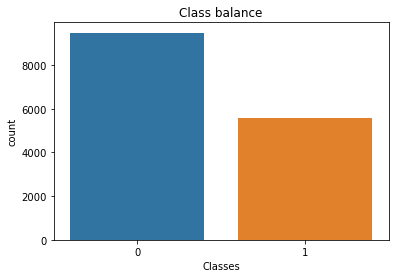

In [11]:
data['class'].value_counts()
sns.countplot(data['class'])
plt.title("Class balance")
plt.xlabel("Classes")

In [12]:
data.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
count,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,...,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,0.426585,0.446743,0.442818,0.413346,0.445080,0.487060,0.236711,0.330916,0.282483,0.312687,...,0.233384,0.017431,0.004258,0.434569,0.666356,0.290932,0.016034,0.007052,0.044974,0.369570
std,0.494597,0.497172,0.496736,0.492450,0.496991,0.499849,0.425077,0.470559,0.450222,0.463603,...,0.422999,0.130874,0.065115,0.495717,0.471530,0.454207,0.125609,0.083683,0.207253,0.482704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Implementação do algoritmo de Machine Learning***

#### ***Separando das variavéis de entrada(variaveis explicativas) e de saída (target)***

In [13]:
X = data.drop('class', axis=1)
y = data['class']

#### ***Separaando a base em treino e teste, sendo 80% para treino e 20% para teste***

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### ***Analisando o shape dos dados após divisão***

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12024, 215), (12024,), (3007, 215), (3007,))

## ***Algoritmos Testados***

* Rede Neurais - Keras/TensorFlow </br>
* Logistic Regression; </br>
* Random Forest; </br>
* KNN (K-Nearest Neighbors); </br>
* MLPClassifier (Multi-layer Perceptron); </br>
* LightGBM; </br>
* SVM (Support Vector Machines); </br>
* Decision Trees; </br>

Os algoritmos foram avaliados em função das métricas: f1-score, precision, recall e acurácia. Porém, a **acurácia** foi determinante para a escolha do melhor desempenho.
Embora todos os modelos tenham apresentado bons resultados, o que teve melhor desempenho foi o de **Redes Neurais**, realizado com as bibliotecas Keras/TensorFlow, tendo apresentado uma acurácia de 99%.
Em contrapartida, o algoritmo de Árvore de Decisão apresentou um desempenho mais abaixo que os demais.

# ***Redes Neurais - Keras (Maior Acurácia)***

#### ***Criando e Avaliando Máquina Preditiva***

In [16]:
# Atribuindo ao nome da máquina preditiva de MP com extensão h5
# Criando e salvando o melhor modelo
model_checkpoint = ModelCheckpoint('MP.h5', monitor="val_accuracy", save_best_only=True)

In [17]:
# Infraestrutura do Modelo
model = Sequential()
model.add(Dense(64, input_shape=X_train.shape[1:], activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [18]:
# Sumário do Modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                13824     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [19]:
# Treinando o modelo em 100 épocas, avaliando e salvando o modelo
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

Epoch 1/100
376/376 [==============================] - 3s 5ms/step - loss: 0.1313 - accuracy: 0.9502 - val_loss: 0.0660 - val_accuracy: 0.9767
Epoch 2/100
376/376 [==============================] - 2s 5ms/step - loss: 0.0596 - accuracy: 0.9820 - val_loss: 0.0584 - val_accuracy: 0.9807
Epoch 3/100
376/376 [==============================] - 2s 5ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0657 - val_accuracy: 0.9837
Epoch 4/100
376/376 [==============================] - 2s 5ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.0609 - val_accuracy: 0.9807
Epoch 5/100
376/376 [==============================] - 2s 5ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0508 - val_accuracy: 0.9874
Epoch 6/100
376/376 [==============================] - 2s 5ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0609 - val_accuracy: 0.9860
Epoch 7/100
376/376 [==============================] - 2s 5ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0621 - val_accuracy: 0.9870

In [20]:
# Carregando o modelo salvo
model1 = load_model("MP.h5")

In [21]:
# Avaliando o modelo
model1.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9910


[0.11624888330698013, 0.9910209774971008]

In [22]:
loss, acc = model1.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9910


In [23]:
y_pred = model1.predict(X_test)

94/94 [==============================] - 3s 2ms/step


In [24]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, np.around(y_pred)),4)*100))
print('Acurácia: {}%'.format(round((acc),4)*100))

Precisão dos dados de teste: 99.28%
Acurácia: 99.1%


Predições com o modelo:

In [25]:
x = random.choice([0,1], 215)
y = random.choice([0,1], 215)
x, y

(array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]),
 array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1

In [26]:
x = x.reshape(1,-1)
y = y.reshape(1,-1)
model1.predict(x), model1.predict(y)

1/1 [==============================] - 0s 19ms/step


(array([[0.]], dtype=float32), array([[0.]], dtype=float32))

In [27]:
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1886
           1       0.99      0.98      0.99      1121

    accuracy                           0.99      3007
   macro avg       0.99      0.99      0.99      3007
weighted avg       0.99      0.99      0.99      3007



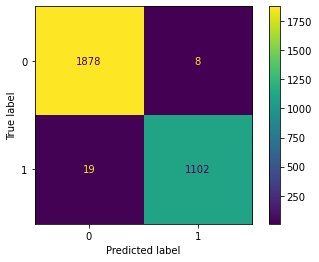

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, np.around(y_pred))
plt.grid(False)
plt.show()

# ***Logistic Regression***

In [29]:
lr = LogisticRegression(random_state=42, max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 96.78%
Acurácia: 97.50999999999999%


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1886
           1       0.97      0.97      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.97      0.97      0.97      3007
weighted avg       0.98      0.98      0.98      3007



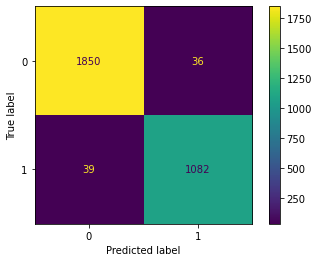

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

# ***Random Forest***

In [32]:
# Criando a Máquina Preditiva - Instanciando o Algoritmo de ML (Random Forest)
clf_RF = RandomForestClassifier(n_estimators=1000)

In [33]:
# Treinando o Algoritmo com os dados de treino
clf_RF = clf_RF.fit(X_train, y_train)

In [34]:
# Validando a Maquina Preditiva - Verificando o nível de Acurácia da Máquina Preditiva
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 96.78%
Acurácia: 97.50999999999999%


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1886
           1       0.97      0.97      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.97      0.97      0.97      3007
weighted avg       0.98      0.98      0.98      3007



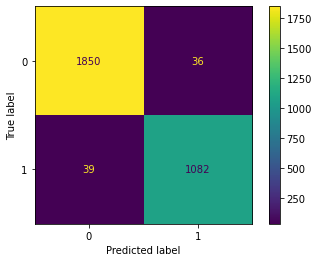

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

# ***KNN (K-Nearest Neighbors)***

#### ***K = 3 e metric = minkowski***

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
# Predição dos dados
y_pred = knn.predict(X_test)

In [38]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 98.37%
Acurácia: 98.34%


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1886
           1       0.98      0.97      0.98      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007



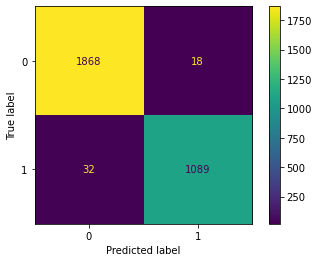

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

#### ***K = 10 e metric = minkowski***

In [41]:
# Construir Modelo e Treinar Dados
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
# Aplicar Modelo aos Dados de Validação
y_predict = knn.predict(X_test)

In [42]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_predict),4)*100))

Precisão dos dados de teste: 98.37%
Acurácia: 97.94%


In [43]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1886
           1       0.99      0.96      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.97      0.98      3007
weighted avg       0.98      0.98      0.98      3007



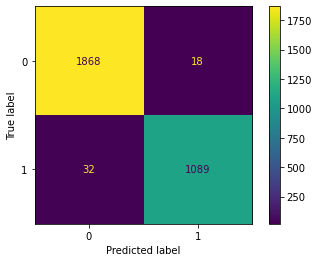

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

#### ***K = 3 e metric = euclidean***

In [45]:
knc = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knc.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 98.89%
Acurácia: 97.94%


In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1886
           1       0.99      0.96      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.97      0.98      3007
weighted avg       0.98      0.98      0.98      3007



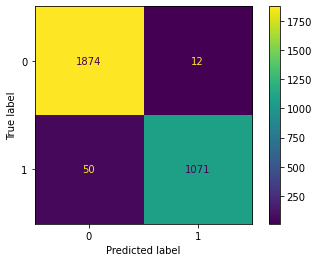

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

#### ***K = 10 e metric = euclidean***

In [48]:
knc = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knc.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 98.89%
Acurácia: 97.94%


In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1886
           1       0.99      0.96      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.97      0.98      3007
weighted avg       0.98      0.98      0.98      3007



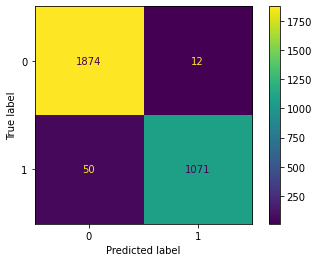

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

# ***MLPClassifier (Multi-layer Perceptron)***

In [51]:
clf = MLPClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [52]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 98.48%
Acurácia: 98.8%


In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1886
           1       0.99      0.96      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.97      0.98      3007
weighted avg       0.98      0.98      0.98      3007



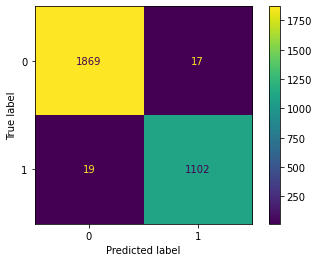

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

#### ***Alpha: 1 e hidden_layer_sizes diferentes: 10***

In [55]:
clf = MLPClassifier(hidden_layer_sizes=10, alpha=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [56]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 97.27%
Acurácia: 97.24000000000001%


In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1886
           1       0.99      0.96      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.97      0.98      3007
weighted avg       0.98      0.98      0.98      3007



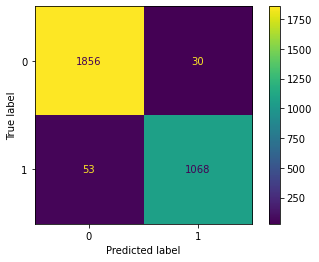

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

# ***SVM (Support Vector Machines)***

In [59]:
# Cria o modelo
modelo_v1 = svm.SVC(kernel = 'linear')
modelo_v1.fit(X_train, y_train)
# Previsões
previsoes_v1 = modelo_v1.predict(X_test)

In [60]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, previsoes_v1),4)*100))

Precisão dos dados de teste: 97.27%
Acurácia: 97.84%


In [61]:
print(classification_report(y_test, previsoes_v1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1886
           1       0.97      0.97      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007



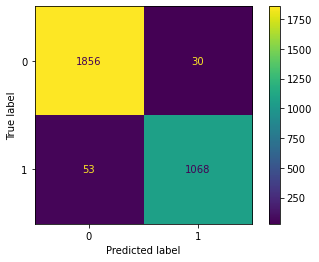

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

# ***Decision Trees***

#### ***Criterion: gini***

In [63]:
model_1 = tree.DecisionTreeClassifier(max_depth=5, criterion='gini').fit(X_train, y_train) # Gini
y_pred = model_1.predict(X_test)

In [64]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 91.42%
Acurácia: 93.85%


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1886
           1       0.91      0.92      0.92      1121

    accuracy                           0.94      3007
   macro avg       0.93      0.94      0.93      3007
weighted avg       0.94      0.94      0.94      3007



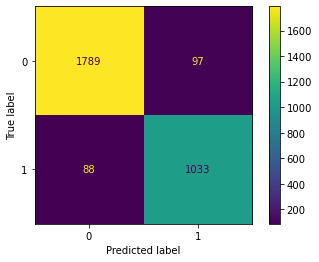

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

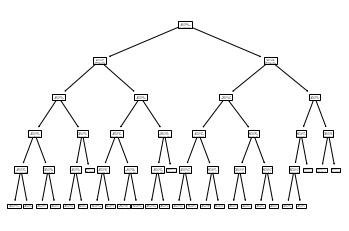

In [67]:
tree.plot_tree(model_1)
plt.show()

#### ***Criterion: entropy***

In [68]:
model_2 = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy').fit(X_train, y_train)# Entropy
y_pred = model_2.predict(X_test)

In [69]:
print('Precisão dos dados de teste: {}%'.format(round(precision_score(y_test, y_pred),4)*100))
print('Acurácia: {}%'.format(round(accuracy_score(y_test, y_pred),4)*100))

Precisão dos dados de teste: 88.41%
Acurácia: 92.67999999999999%


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1886
           1       0.88      0.93      0.90      1121

    accuracy                           0.93      3007
   macro avg       0.92      0.93      0.92      3007
weighted avg       0.93      0.93      0.93      3007



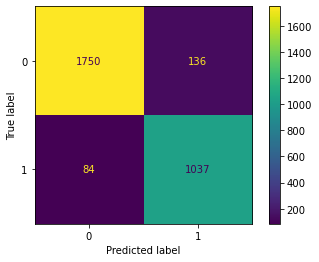

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

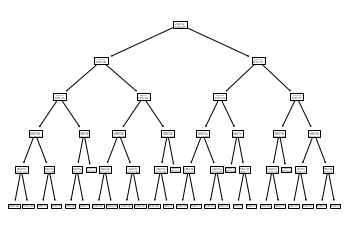

In [72]:
tree.plot_tree(model_2)
plt.show()